In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import librosa.display
import IPython.display
import os

plt.rcParams['figure.figsize'] = (14,4)
SAMPLE_RATE = 44100

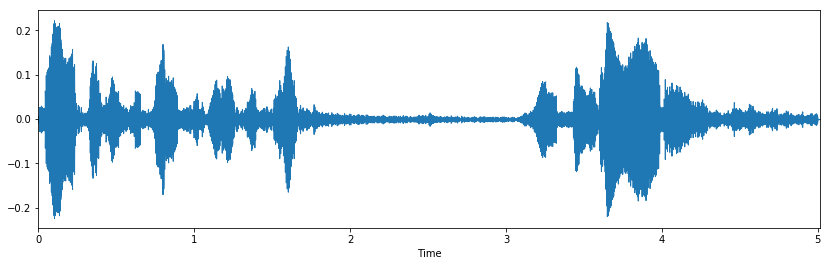

In [53]:
x, fs = librosa.load('data/obama_aud/obama4.wav')
librosa.display.waveplot(x, sr=fs)

In [55]:
IPython.display.Audio(x, rate=fs)

In [56]:
len(x)

110592

In [57]:
fs

22050

In [58]:
len(x)/fs

5.015510204081632

In [59]:
mfccs = librosa.feature.mfcc(x, sr=fs)
mfccs.shape

(20, 217)

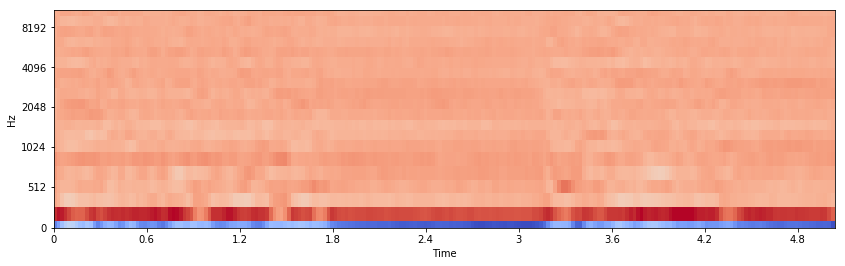

In [62]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time', y_axis='mel')

In [63]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


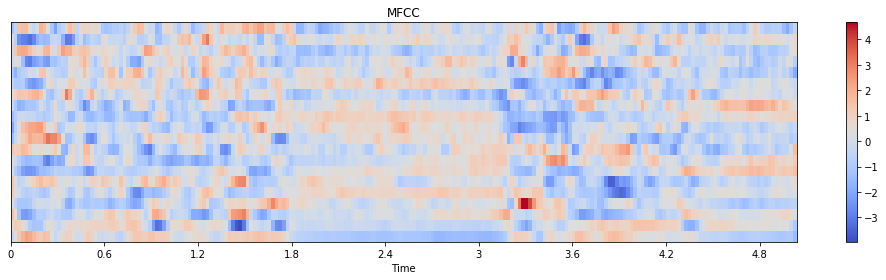

In [64]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

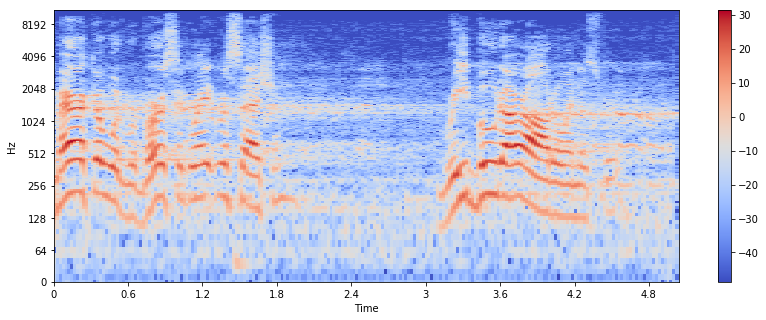

In [65]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()

In [19]:
def get_mfcc(name):
    b, _ = librosa.core.load(name, sr = SAMPLE_RATE)
    assert _ == SAMPLE_RATE
    try:
        mfcc = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=20)
        return np.array(np.hstack((np.mean(mfcc, axis=1), np.std(mfcc, axis=1))))
    except:
        print('bad file')
        return np.array([0]*40)

In [20]:
temp = get_mfcc("data/obama_aud/obama1.wav")
temp.shape
                

(40,)

In [21]:
x = []
y = []

for filename in os.listdir('data/obama_aud'):
    df = get_mfcc("data/obama_aud/" + filename)
    x.append(df)
    y.append(0)
    
for filename in os.listdir('data/trump_aud'):
    df = get_mfcc("data/trump_aud/" + filename)
    x.append(df)
    y.append(1)



In [22]:
data = pd.DataFrame(x)

In [23]:
label = pd.DataFrame(y)

In [24]:
data['label'] = label
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-482.696655,131.274292,5.255772,48.101688,4.188444,7.937295,9.555653,1.654705,-3.397228,-7.685096,...,9.539505,9.664850,9.004908,6.245222,7.090738,6.709933,6.549908,6.759874,5.570432,0
1,-498.142242,124.404831,17.124168,35.046207,6.253777,5.297566,10.830300,5.531430,0.662352,-5.063707,...,6.036921,9.391821,8.067077,6.118172,7.399320,5.808776,7.219196,5.296982,6.808209,0
2,-332.394135,181.136826,-58.127144,-18.123041,-3.506206,-8.957919,2.492747,-8.960974,-5.676217,-7.706248,...,6.255640,7.485517,5.706029,6.763659,5.560946,7.181450,7.864204,5.598686,5.663389,0
3,-605.040588,139.063202,-5.876999,49.974594,-10.336264,3.701844,4.731455,-1.755670,-9.687898,-10.973948,...,10.480642,10.109097,9.263336,7.924215,6.868700,8.196333,9.271370,6.421955,7.170714,0
4,-387.443695,168.106674,-35.676319,22.658945,-5.802243,3.210499,4.371513,5.651891,-8.861131,-15.869907,...,9.673162,9.628323,11.105166,10.628905,8.665806,7.777363,7.722625,6.340987,5.863929,0


In [25]:
data.shape

(215, 41)

In [26]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-682.373474,115.914627,17.840885,37.375900,9.760698,7.223373,11.516227,2.718247,-4.222383,-5.300497,...,9.095526,7.993520,7.225136,6.064591,6.331748,6.515132,7.147253,5.793070,4.512633,0
1,-284.692291,138.049423,-48.548306,10.860511,-20.588820,-6.365626,-12.394799,-14.881385,-6.215963,-12.389153,...,13.106396,8.108459,8.343304,10.123379,7.858484,6.760475,6.500817,7.932330,7.046658,1
2,-372.197449,164.604828,-38.052711,1.636168,-1.690663,-6.167624,-1.946759,6.652860,3.198111,3.339638,...,7.806391,10.435169,8.518793,9.332574,7.044990,7.312103,7.268166,8.065729,5.891767,0
3,-299.574982,129.432388,-37.098648,11.013266,-10.538941,3.064353,-8.268917,-13.428058,-6.613580,-11.501785,...,14.802958,7.018799,7.692950,9.688807,9.091418,7.149785,7.471327,5.925230,5.860527,1
4,-389.395172,156.605057,-22.520250,0.474326,6.915562,0.148098,1.469929,-3.592239,-3.324821,-7.405579,...,7.130429,8.647894,5.730814,7.023583,7.243707,5.138942,7.848526,5.725677,5.918115,0


In [27]:
X = data.iloc[:,:-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-682.373474,115.914627,17.840885,37.375900,9.760698,7.223373,11.516227,2.718247,-4.222383,-5.300497,...,10.494206,9.095526,7.993520,7.225136,6.064591,6.331748,6.515132,7.147253,5.793070,4.512633
1,-284.692291,138.049423,-48.548306,10.860511,-20.588820,-6.365626,-12.394799,-14.881385,-6.215963,-12.389153,...,10.396674,13.106396,8.108459,8.343304,10.123379,7.858484,6.760475,6.500817,7.932330,7.046658
2,-372.197449,164.604828,-38.052711,1.636168,-1.690663,-6.167624,-1.946759,6.652860,3.198111,3.339638,...,9.327931,7.806391,10.435169,8.518793,9.332574,7.044990,7.312103,7.268166,8.065729,5.891767
3,-299.574982,129.432388,-37.098648,11.013266,-10.538941,3.064353,-8.268917,-13.428058,-6.613580,-11.501785,...,7.792670,14.802958,7.018799,7.692950,9.688807,9.091418,7.149785,7.471327,5.925230,5.860527
4,-389.395172,156.605057,-22.520250,0.474326,6.915562,0.148098,1.469929,-3.592239,-3.324821,-7.405579,...,7.107373,7.130429,8.647894,5.730814,7.023583,7.243707,5.138942,7.848526,5.725677,5.918115


In [28]:
Y = data.iloc[:,-1]

In [29]:
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: label, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(n_estimators = 150)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=10, shuffle = True)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
def proba2labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids

print(rfc.score(X_val, y_val))

0.9767441860465116


In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [33]:
principalDf.head()

,principal component 1,principal component 2
0,281.820674,29.503616
1,-123.565409,-11.204517
2,-38.261185,35.589819
3,-102.598275,-30.112001
4,-14.467577,14.436051


<Figure size 1008x288 with 0 Axes>

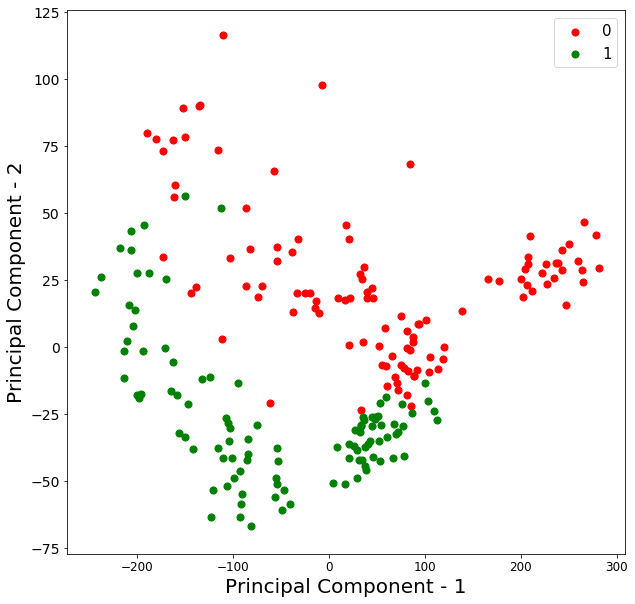

In [34]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['label'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [35]:
#make predict function
def pred(name):
    b, _ = librosa.core.load(name, sr = SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=20)
    x_test = np.array(np.hstack((np.mean(mfcc, axis=1), np.std(mfcc, axis=1))))
    return rfc.predict([x_test])

In [36]:
pred("data/obama_aud/obama17.wav")

array([0])